<a href="https://colab.research.google.com/github/FajarWahyuni/Project-ML/blob/main/Kelompok_Project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kelompok Project ML**


1.   Fajar Tri Wahyuni        (2211110009)
2.   Nahila Shofie Kirana     (2211110023)
3.   Natasya Syafila 'Ashifa  (2211110028)
4.   Putri Ella Nazila        (2211110047)




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisasi
import matplotlib.pyplot as plt # visualisasi
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import davies_bouldin_score
plt.style.use('fivethirtyeight')

In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/Data Project ML .xlsx')

In [ ]:
df1

,Balita,BB,TB,Usia(bln)
0,Balita 1,11.3,97.0,32
1,Balita 2,15.8,95.0,31
2,Balita 3,10.5,89.0,31
3,Balita 4,13.3,94.0,30
4,Balita 5,12.3,84.7,23
...,...,...,...,...
92,Balita 93,10.0,74.5,20
93,Balita 94,9.0,77.0,26
94,Balita 95,5.6,63.0,16
95,Balita 96,10.1,90.0,29


In [ ]:
df1.shape

(97, 4)

In [ ]:
df1.isnull().sum()

Balita       0
BB           0
TB           0
Usia(bln)    0
dtype: int64

In [ ]:
df1.duplicated().sum()

0

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Balita     97 non-null     object 
 1   BB         97 non-null     float64
 2   TB         97 non-null     float64
 3   Usia(bln)  97 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.2+ KB


In [ ]:
df1.describe()

,BB,TB,Usia(bln)
count,97.000000,97.000000,97.000000
mean,9.146392,76.654639,19.577320
std,1.962789,9.297961,9.877199
min,4.550000,56.000000,1.000000
25%,7.800000,71.500000,12.000000
50%,9.200000,77.000000,19.000000
75%,10.300000,84.000000,28.000000
max,15.800000,97.000000,36.000000


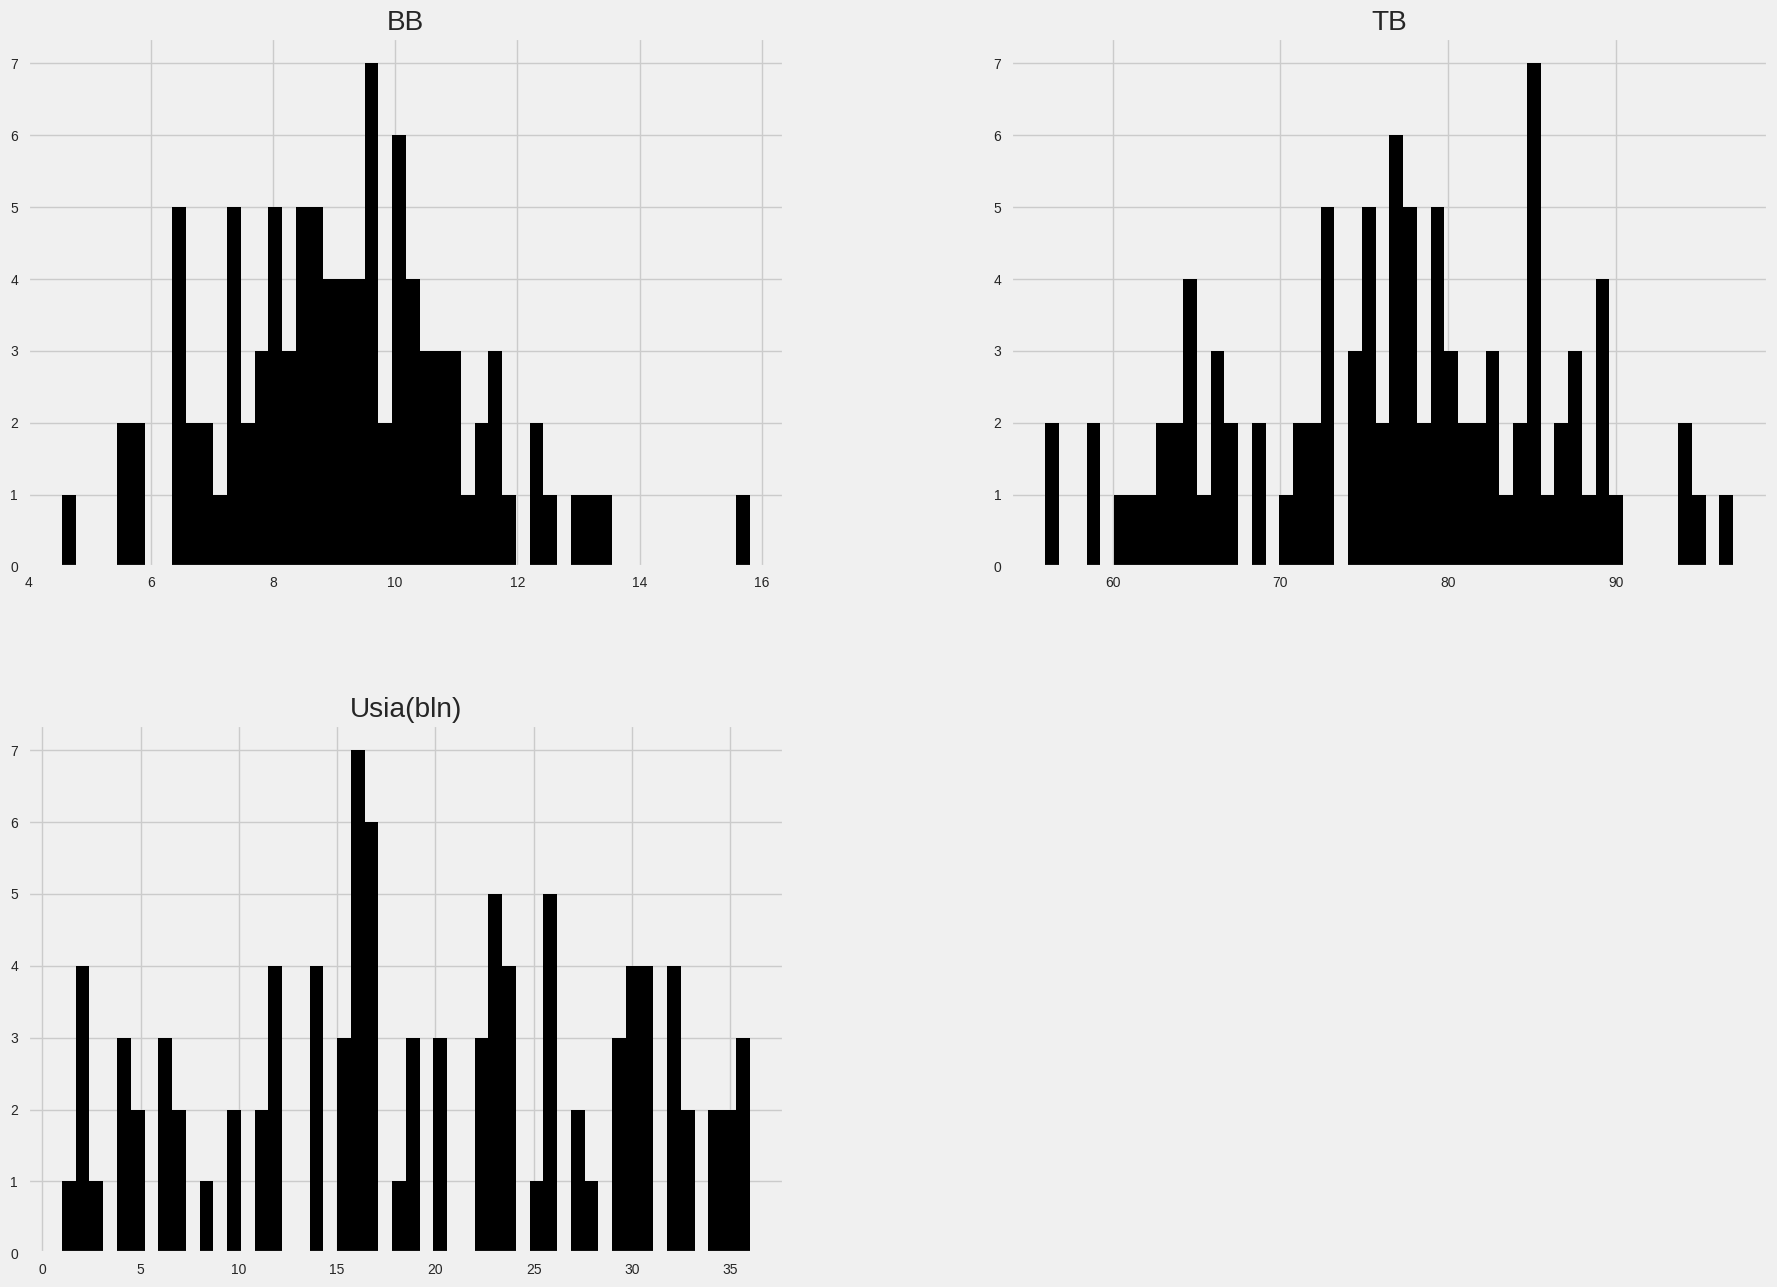

In [ ]:
df1.hist(bins=50, figsize=(20, 15), color = 'black');

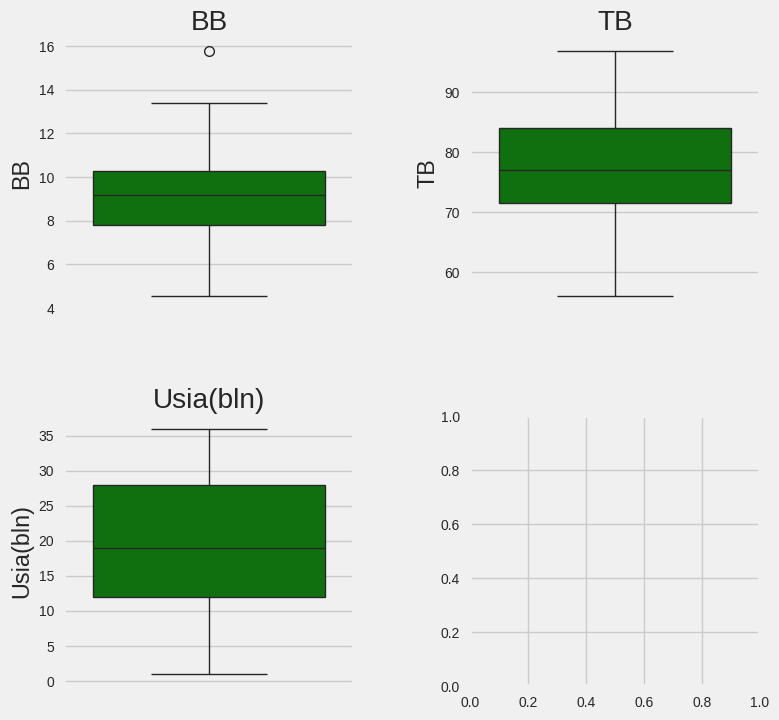

In [ ]:
import math
def box_plot(data):
  # Definisikan variabel yang akan divisualisasikan
  variables = data.select_dtypes(include='number').columns.tolist()
  # Buat figure dan axes
  num_vars = len(variables)
  num_cols = 2
  num_rows = math.ceil(num_vars / num_cols)
  fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols *4, num_rows *4)) # sesuaikan ukuran
  fig.subplots_adjust(hspace= 0.4, wspace=0.4) #atur jarak

  axes = axes.flatten()

  #Iterasi
  for i, var in enumerate(variables):
    sns.boxplot(y=var, data=data, color="green", ax=axes[i])
    axes[i].set_title(var) # tambahkan judul


  plt.show()

box_plot(df1)

In [ ]:
df = df1.drop(columns=['Balita', 'Usia(bln)'], inplace=True)

In [ ]:
df2 = df1.iloc[:, :].values
df2

array([[11.3 , 97.  ],
       [15.8 , 95.  ],
       [10.5 , 89.  ],
       [13.3 , 94.  ],
       [12.3 , 84.7 ],
       [10.7 , 85.  ],
       [13.4 , 87.2 ],
       [11.4 , 87.  ],
       [ 9.6 , 78.  ],
       [10.8 , 83.5 ],
       [10.3 , 80.  ],
       [ 9.6 , 77.  ],
       [11.6 , 89.  ],
       [10.  , 79.  ],
       [ 7.4 , 75.  ],
       [ 8.5 , 79.  ],
       [10.  , 83.  ],
       [ 9.2 , 76.6 ],
       [ 9.9 , 78.5 ],
       [ 9.  , 77.  ],
       [10.2 , 80.  ],
       [ 7.7 , 72.  ],
       [ 7.8 , 72.  ],
       [ 8.7 , 79.  ],
       [ 9.6 , 79.  ],
       [ 8.  , 78.  ],
       [ 6.8 , 65.  ],
       [ 8.7 , 68.6 ],
       [ 7.6 , 76.3 ],
       [ 8.3 , 73.2 ],
       [ 9.2 , 83.  ],
       [ 8.  , 65.  ],
       [ 8.12, 68.5 ],
       [ 7.28, 66.2 ],
       [ 7.4 , 64.3 ],
       [ 7.1 , 65.2 ],
       [ 8.6 , 70.5 ],
       [ 9.  , 79.5 ],
       [ 9.3 , 85.  ],
       [10.7 , 84.7 ],
       [11.6 , 85.6 ],
       [ 8.4 , 80.  ],
       [12.3 , 87.  ],
       [ 9.

In [ ]:
min_max_scaler = MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(df2)
scaled_data

array([[0.6       , 1.        ],
       [1.        , 0.95121951],
       [0.52888889, 0.80487805],
       [0.77777778, 0.92682927],
       [0.68888889, 0.7       ],
       [0.54666667, 0.70731707],
       [0.78666667, 0.76097561],
       [0.60888889, 0.75609756],
       [0.44888889, 0.53658537],
       [0.55555556, 0.67073171],
       [0.51111111, 0.58536585],
       [0.44888889, 0.51219512],
       [0.62666667, 0.80487805],
       [0.48444444, 0.56097561],
       [0.25333333, 0.46341463],
       [0.35111111, 0.56097561],
       [0.48444444, 0.65853659],
       [0.41333333, 0.50243902],
       [0.47555556, 0.54878049],
       [0.39555556, 0.51219512],
       [0.50222222, 0.58536585],
       [0.28      , 0.3902439 ],
       [0.28888889, 0.3902439 ],
       [0.36888889, 0.56097561],
       [0.44888889, 0.56097561],
       [0.30666667, 0.53658537],
       [0.2       , 0.2195122 ],
       [0.36888889, 0.30731707],
       [0.27111111, 0.49512195],
       [0.33333333, 0.4195122 ],
       [0.

In [ ]:
# Inisialisasi model KMeans dengan 3 cluster
model1 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

# Melatih model KMEans dengan data yang telah dinormalisasi
model1.fit(scaled_data)

# Memprediksi cluster untuk setiap data point dalam data
y_kmeans = model1.predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
scaled_df = pd.DataFrame(scaled_data, columns=['Berat Badan', 'Tinggi Badan'])
scaled_df

,Berat Badan,Tinggi Badan
0,0.600000,1.000000
1,1.000000,0.951220
2,0.528889,0.804878
3,0.777778,0.926829
4,0.688889,0.700000
...,...,...
92,0.484444,0.451220
93,0.395556,0.512195
94,0.093333,0.170732
95,0.493333,0.829268


In [ ]:
scaled_df['Hasil Cluster'] = model1.labels_
scaled_df

,Berat Badan,Tinggi Badan,Hasil Cluster
0,0.600000,1.000000,0
1,1.000000,0.951220,0
2,0.528889,0.804878,0
3,0.777778,0.926829,0
4,0.688889,0.700000,0
...,...,...,...
92,0.484444,0.451220,2
93,0.395556,0.512195,2
94,0.093333,0.170732,1
95,0.493333,0.829268,0


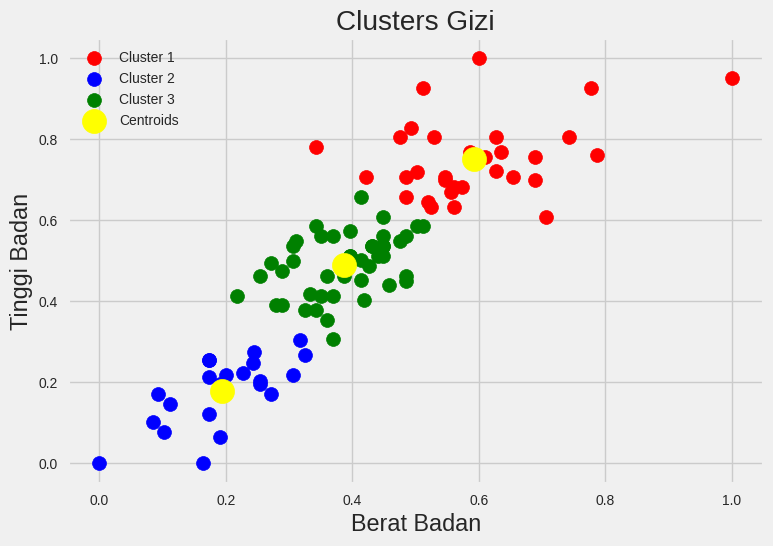

In [ ]:
plt.scatter(scaled_data[y_kmeans == 0, 0], scaled_data[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(scaled_data[y_kmeans == 1, 0], scaled_data[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(scaled_data[y_kmeans == 2, 0], scaled_data[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(model1.cluster_centers_[:, 0], model1.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters Gizi')
plt.xlabel('Berat Badan')
plt.ylabel('Tinggi Badan')
plt.legend()
plt.show()

In [ ]:
#Menghitung Silhouette score algoritma k-means
Evaluasi_KMeans = silhouette_score(scaled_data, y_kmeans)
print("Silhouette Score:" , Evaluasi_KMeans)

Silhouette Score: 0.5104974064904667


In [ ]:
cluster_stats = scaled_df.groupby('Hasil Cluster').mean()
print(cluster_stats)

               Berat Badan  Tinggi Badan
Hasil Cluster                           
0                 0.592258      0.752714
1                 0.194141      0.178936
2                 0.386364      0.490798


In [ ]:
# Determine gizi label based on cluster analysis
def determine_gizi_label(cluster):
    if cluster == 0:
        return "Gizi Lebih"
    elif cluster == 1:
        return "Gizi Kurang"
    elif cluster == 2:
        return "Gizi Normal"
    else:
        return "Unknown"

In [ ]:
# Add a new column for gizi label
scaled_df['Gizi Label'] = scaled_df['Hasil Cluster'].apply(determine_gizi_label)

In [ ]:
# Display some data with gizi
scaled_df

,Berat Badan,Tinggi Badan,Hasil Cluster,Gizi Label
0,0.600000,1.000000,0,Gizi Lebih
1,1.000000,0.951220,0,Gizi Lebih
2,0.528889,0.804878,0,Gizi Lebih
3,0.777778,0.926829,0,Gizi Lebih
4,0.688889,0.700000,0,Gizi Lebih
...,...,...,...,...
92,0.484444,0.451220,2,Gizi Normal
93,0.395556,0.512195,2,Gizi Normal
94,0.093333,0.170732,1,Gizi Kurang
95,0.493333,0.829268,0,Gizi Lebih
